In [3]:
import pandas as pd
import numpy as np
import openpyxl

In [4]:
price = pd.read_csv("price2012-2017.csv", encoding="euc-kr")

In [5]:
#나중에 '구별' merge 함수 이용하기 위해 엑셀 value가 구별이 아닌 것은 전부 구별로 수정
price.rename(columns={price.columns[0]: '구별'}, inplace=True)


In [6]:
price.head()

구별  2012년 중위값 평균  2013년 중위값 평균  2014년 중위값 평균  2015년 중위값 평균  2016년 중위값 평균  \
0  종로구      435000.0     434416.67     395166.67     401750.00     412541.67   
1   중구      485943.2     467500.00     463583.33     485583.33     506250.00   
2  용산구      771000.0     710416.67     666875.00     677125.00     689208.33   
3  성동구      462541.7     435791.67     449333.33     467875.00     485958.33   
4  광진구      545333.3     513041.67     512166.67     536500.00     565791.67   

   2017년 중위값 평균  
0     431833.33  
1     527166.67  
2     727791.67  
3     509416.67  
4     597708.33

In [7]:
price['5개년 누적 아파트 가격 변화량'] = price['2017년 중위값 평균'] - price['2013년 중위값 평균']

In [8]:
price5 = price.loc[:,['구별','5개년 누적 아파트 가격 변화량']]

In [9]:
price5.sort_values(by="5개년 누적 아파트 가격 변화량", ascending=False)

구별  5개년 누적 아파트 가격 변화량
22    강남구          281000.00
21    서초구          238858.33
23    송파구          143291.67
15    강서구          105791.67
19    동작구          100583.33
25  서울 평균           91858.83
13    마포구           88750.00
4     광진구           84666.66
3     성동구           73625.00
5    동대문구           64583.34
10    노원구           61708.33
14    양천구           61125.00
1      중구           59666.67
7     성북구           56500.00
18   영등포구           55458.34
20    관악구           53916.67
17    금천구           52291.66
16    구로구           51000.00
11    은평구           49791.66
12   서대문구           48500.00
9     도봉구           39666.66
24    강동구           35125.00
8     강북구           29333.33
6     중랑구           19791.67
2     용산구           17375.00
0     종로구           -2583.34

In [90]:
price5.set_index("구별", inplace=True)

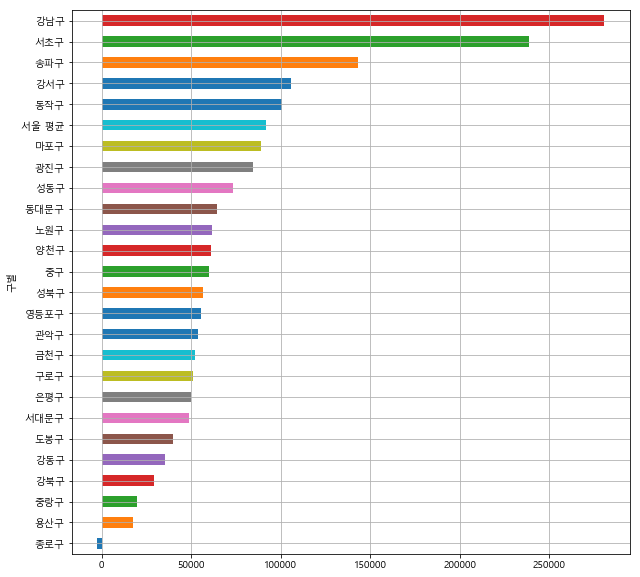

In [91]:
plt.figure()
price5['5개년 누적 아파트 가격 변화량'].sort_values().plot(kind='barh', grid=True, figsize=(10,10),) # 수평 막대 그래프를, 그리드를 사용하여, 그림 크기를 10*10으로 지정함.
plt.show()

 - 같은 서울 시내라도 5년간 아파트 가격 변화량의 차이는 구마다 엄청난 차이가 났다. '강남구', '서초구', '송파구' 상위 세개의 구를 가지고 어떤 요인이 아파트 가격에 영향을 미쳤나 분석해 볼 것이다.

In [111]:
# loc 함수를 이용해서 상위 3구와 하위 3구 추출
price_primary = price5.loc[['강남구','서초구','송파구','중랑구','용산구','종로구'],:]
price_primary.sort_values(by='5개년 누적 아파트 가격 변화량', ascending=False)

5개년 누적 아파트 가격 변화량
구별                    
강남구          281000.00
서초구          238858.33
송파구          143291.67
중랑구           19791.67
용산구           17375.00
종로구           -2583.34

In [112]:
price["2013년 시세 증가율"] = price['2013년 중위값 평균']/price['2012년 중위값 평균'] * 100
price["2014년 시세 증가율"] = price['2014년 중위값 평균']/price['2013년 중위값 평균'] * 100
price["2015년 시세 증가율"] = price['2015년 중위값 평균']/price['2014년 중위값 평균'] * 100
price["2016년 시세 증가율"] = price['2016년 중위값 평균']/price['2015년 중위값 평균'] * 100
price["2017년 시세 증가율"] = price['2017년 중위값 평균']/price['2016년 중위값 평균'] * 100

In [93]:
price.loc[:,['구별','2013년 시세 증가율','2014년 시세 증가율','2015년 시세 증가율'
             ,'2016년 시세 증가율','2017년 시세 증가율',]]

구별  2013년 시세 증가율  2014년 시세 증가율  2015년 시세 증가율  2016년 시세 증가율  \
0     종로구     99.865901     90.964896    101.665963    102.686166   
1      중구     96.204659     99.162210    104.745641    104.256050   
2     용산구     92.142240     93.870967    101.537020    101.784505   
3     성동구     94.216731    103.107370    104.126484    103.864992   
4     광진구     94.078552     99.829449    104.751057    105.459771   
5    동대문구     95.201998    101.941264    104.089357    106.579102   
6     중랑구     97.413083     98.258139    103.225806    103.181307   
7     성북구     96.544646    102.976612    103.165864    104.925505   
8     강북구     95.055635    100.806241    102.928276    103.860135   
9     도봉구     90.927363    101.720869    104.702778    104.669434   
10    노원구     95.886063    102.553413    107.588077    105.620277   
11    은평구     97.643910    104.058129    103.306982    101.913021   
12   서대문구     97.129062    101.676602    102.308538    104.238301   
13    마포구    100.616122    102.185585    104.296120    104.269425   
14    양천구     95.884902     99.803369    102.098680    103.918113   
15    강서구     92.672120     99.840627    110.424853    110.786168   
16    구로구     97.202085     99.241138    105.418589    105.940468   
17    금천구     99.224913    102.756931    104.799521    104.921065   
18   영등포구     95.985444     99.733471    104.286155    105.194164   
19    동작구     94.441398    106.447241    104.647143    104.536369   
20    관악구     95.298588    101.401390    101.505620    104.815143   
21    서초구     94.573278    101.654000    110.448905    109.908911   
22    강남구     93.049174    102.593846    111.390285    110.065789   
23    송파구     99.002901    102.148569    106.525246    104.122960   
24    강동구     93.131110    101.306571    110.616824     96.079755   
25  서울 평균     94.946761    101.288571    106.996950    105.537242   

    2017년 시세 증가율  
0     104.676294  
1     104.131688  
2     105.598212  
3     104.827233  
4     105.641062  
5     105.479753  
6     102.032741  
7     104.079687  
8     101.291178  
9     103.186518  
10    107.884928  
11    106.232011  
12    105.554918  
13    108.045101  
14    106.281286  
15    107.357223  
16    104.674773  
17    105.517147  
18    103.869579  
19    105.943969  
20    106.357587  
21    105.153554  
22    108.295619  
23    106.788062  
24    100.290186  
25    105.201740

In [94]:
price["5개년 전년대비 평균 변화율"] = (price["2013년 시세 증가율"]+price["2014년 시세 증가율"]+
price["2015년 시세 증가율"]+price["2016년 시세 증가율"]
+price["2017년 시세 증가율"])/5

In [95]:
price.loc[:,['구별', '5개년 전년대비 평균 변화율']].sort_values(by="5개년 전년대비 평균 변화율", ascending=False)

구별  5개년 전년대비 평균 변화율
22    강남구       105.078943
21    서초구       104.347729
15    강서구       104.216198
10    노원구       103.906552
13    마포구       103.882470
23    송파구       103.717547
17    금천구       103.443915
19    동작구       103.203224
25  서울 평균       102.794253
5    동대문구       102.658295
11    은평구       102.630811
16    구로구       102.495411
7     성북구       102.338463
12   서대문구       102.181484
3     성동구       102.028562
4     광진구       101.951978
20    관악구       101.875665
18   영등포구       101.813763
1      중구       101.700050
14    양천구       101.597270
9     도봉구       101.041392
6     중랑구       100.822216
8     강북구       100.788293
24    강동구       100.284889
0     종로구        99.971844
2     용산구        98.986589

In [97]:
data_price = pd.merge(price, price5,)

In [101]:
# 그래프 그리기를 위한 set_index => 구별을 중심
data_price.set_index("구별", inplace=True)

In [102]:
import numpy as np
np.corrcoef(data_price["5개년 누적 아파트 가격 변화량"],data_price["5개년 전년대비 평균 변화율"])

array([[1.        , 0.76079363],
       [0.76079363, 1.        ]])

 - 부동산 가격은 떨어지지 않는다는 말이 있다. 실제로 5개년동안 서울 구별 가격이 떨어진 것은 '종로구' 가 유일했다.
    아파트 가격 변화 = 아파트 가격 증가로 봐도 무방 할 것이다. 그러므로 아파트 가격 변화율이 높을수록 가격 증가폭이 높은
    양의 상관관계가 나타난다.

In [20]:
import matplotlib.pyplot as plt

In [75]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [140]:
price.set_index("구별", inplace=True)

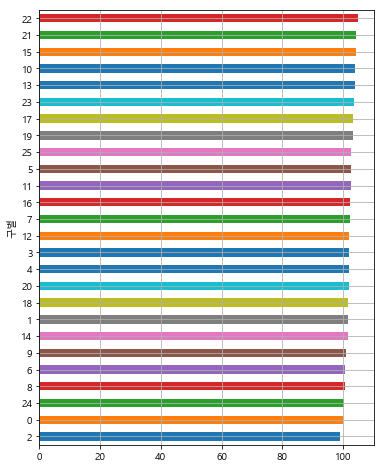

In [77]:
plt.ylabel('구별')
price['5개년 전년대비 평균 변화율'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(6,8))
plt.show('구', '5개년 전년대비 평균 변화율')

- 일반적으로 부동산 가격은 상승하는데 5개년 평균동안 가격이 상승한 상위 세구 강남구, 서초구, 강서구와
하위 세구 강동구, 종로구, 용산구를 데이터 분석에 사용한다.

In [11]:
money = pd.read_csv("Seoul money.csv", encoding="euc-kr")
money.rename(columns={money.columns[0]: '구별'}, inplace=True)
money.columns[0]

'구별'

In [118]:
money['2013 변화율'] = money['2013']/money['2012'] * 100
money['2014 변화율'] = money['2014']/money['2013'] * 100
money['2015 변화율'] = money['2013']/money['2014'] * 100
money['2016 변화율'] = money['2013']/money['2015'] * 100
money['2017 변화율'] = money['2013']/money['2016'] * 100
money['재정자립도 5개년 변화율'] = (money['2013 변화율']+money['2014 변화율']
                   +money['2015 변화율']+money['2016 변화율']+money['2017 변화율'])/5

In [119]:
money.sort_values(by="재정자립도 5개년 변화율", ascending=False)

구별  2012  2013  2014  2015  2016  2017   2013 변화율    2014 변화율  \
21    관악구  34.0  33.0    31    25    25  20.6  97.058824   93.939394   
13   서대문구  40.8  39.2    34    30    30  26.6  96.078431   86.734694   
20    동작구  44.4  40.0    34    29    33  27.2  90.090090   85.000000   
12    은평구  30.9  29.2    25    22    24  19.1  94.498382   85.616438   
4     성동구  50.4  48.7    45    39    40  34.5  96.626984   92.402464   
18    금천구  42.2  39.1    34    32    31  27.2  92.654028   86.956522   
11    노원구  22.7  22.3    19    18    19  17.8  98.237885   85.201794   
8     성북구  33.4  30.5    27    24    26  21.8  91.317365   88.524590   
15    양천구  39.0  35.8    32    29    31  28.5  91.794872   89.385475   
6    동대문구  41.6  35.9    33    29    30  27.2  86.298077   91.922006   
25    강동구  44.2  39.1    35    32    33  30.1  88.461538   89.514066   
7     중랑구  30.7  28.0    26    24    23  20.6  91.205212   92.857143   
10    도봉구  30.1  27.6    25    23    24  19.8  91.694352   90.579710   
23    강남구  80.5  75.9    70    66    65  58.2  94.285714   92.226614   
17    구로구  36.8  32.1    31    27    27  24.0  87.228261   96.573209   
3     용산구  61.6  55.4    51    48    47  42.4  89.935065   92.057762   
9     강북구  29.6  26.2    24    22    23  18.8  88.513514   91.603053   
22    서초구  81.5  73.8    69    64    64  52.5  90.552147   93.495935   
14    마포구  49.1  46.1    43    41    41  32.9  93.890020   93.275488   
16    강서구  33.1  29.7    28    26    26  21.6  89.728097   94.276094   
1     종로구  65.7  61.0    61    56    55  50.8  92.846271  100.000000   
24    송파구  63.3  55.1    51    49    49  42.8  87.045814   92.558984   
0   서울 평균  90.2  88.8    84    84    83  80.5  98.447894   94.594595   
2      중구  76.9  70.9    72    66    65  58.4  92.197659  101.551481   
5     광진구  37.7  34.2    32    31    32  28.1  90.716180   93.567251   
19   영등포구  56.2  49.4    49    46    45  42.0  87.900356   99.190283   

      2015 변화율    2016 변화율    2017 변화율  재정자립도 5개년 변화율  
21  106.451613  132.000000  132.000000     112.289966  
13  115.294118  130.666667  130.666667     111.888115  
20  117.647059  137.931034  121.212121     110.376061  
12  116.800000  132.727273  121.666667     110.261752  
4   108.222222  124.871795  121.750000     108.774693  
18  115.000000  122.187500  126.129032     108.585416  
11  117.368421  123.888889  117.368421     108.413082  
8   112.962963  127.083333  117.307692     107.439189  
15  111.875000  123.448276  115.483871     106.397499  
6   108.787879  123.793103  119.666667     106.093546  
25  111.714286  122.187500  118.484848     106.072448  
7   107.692308  116.666667  121.739130     106.032092  
10  110.400000  120.000000  115.000000     105.534812  
23  108.428571  115.000000  116.769231     105.342026  
17  103.548387  118.888889  118.888889     105.025527  
3   108.627451  115.416667  117.872340     104.781857  
9   109.166667  119.090909  113.913043     104.457437  
22  106.956522  115.312500  115.312500     104.325921  
14  107.209302  112.439024  112.439024     103.850572  
16  106.071429  114.230769  114.230769     103.707432  
1   100.000000  108.928571  110.909091     102.536787  
24  108.039216  112.448980  112.448980     102.508394  
0   105.714286  105.714286  106.987952     102.291802  
2    98.472222  107.424242  109.076923     101.744506  
5   106.875000  110.322581  106.875000     101.671202  
19  100.816327  107.391304  109.777778     101.015210

In [12]:
data_result = pd.merge(price, money, on="구별")
data_result.head()

구별  2012년 중위값 평균  2013년 중위값 평균  2014년 중위값 평균  2015년 중위값 평균  2016년 중위값 평균  \
0  종로구      435000.0     434416.67     395166.67     401750.00     412541.67   
1   중구      485943.2     467500.00     463583.33     485583.33     506250.00   
2  용산구      771000.0     710416.67     666875.00     677125.00     689208.33   
3  성동구      462541.7     435791.67     449333.33     467875.00     485958.33   
4  광진구      545333.3     513041.67     512166.67     536500.00     565791.67   

   2017년 중위값 평균  5개년 누적 아파트 가격 변화량  2012  2013  2014  2015  2016  2017  
0     431833.33           -2583.34  65.7  61.0    61    56    55  50.8  
1     527166.67           59666.67  76.9  70.9    72    66    65  58.4  
2     727791.67           17375.00  61.6  55.4    51    48    47  42.4  
3     509416.67           73625.00  50.4  48.7    45    39    40  34.5  
4     597708.33           84666.66  37.7  34.2    32    31    32  28.1

In [121]:
# 그래프 그리기를 위한 set_index => 구별을 중심
data_result.set_index("구별", inplace=True)

In [122]:
import numpy as np
np.corrcoef(data_result["5개년 전년대비 평균 변화율"],data_result["재정자립도 5개년 변화율"])

array([[1.        , 0.07919851],
       [0.07919851, 1.        ]])

- 재정자립도란 전체재원에 대한 자주재원 비율을 말한다. 집 가격 상승폭이 높을수록 지방세 수입 또한 높아질 것이므로 집 가격이 상승된 구들은
재정자립도가 상승할 것으로 예측했지만 예상외로 상관관계 정도가 매우 낮았다. 아파트 가격 상승이 지방 재정수입으로 연결되지 않는다는 것을 알 수 있다.

In [123]:
# polyfit 함수를 이용해 지정한 특정 차수의 다항식 계수를 계산하고,
fp1 = np.polyfit(data_result['5개년 전년대비 평균 변화율'], data_result['재정자립도 5개년 변화율'], 1)
fp1

array([ 0.17182029, 88.24680682])

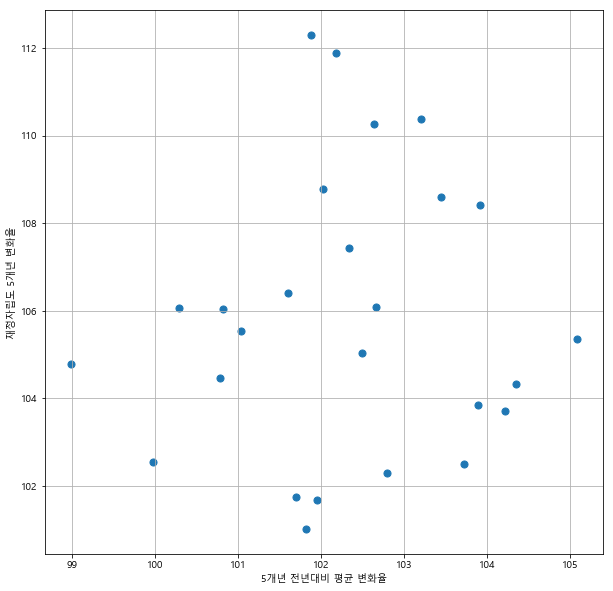

In [145]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['5개년 전년대비 평균 변화율'], data_result['재정자립도 5개년 변화율'], s=50)
plt.xlabel('5개년 전년대비 평균 변화율')
plt.ylabel('재정자립도 5개년 변화율')
plt.grid()
plt.show()

- 무의미한 상관관계가 도출 되었음 더 조사할 필요 없음

In [209]:
import pandas as pd
import numpy as np

In [126]:
# 좋은 집 비싼 집에 살면 그렇지 않은 사람 보다 결혼을 더 많이할까? 구별 결혼률 이혼률로 비교해보기

In [218]:
marry = pd.read_csv("marry.csv", encoding="euc-kr")

In [219]:
marry.sort_values(by="2017결혼",ascending=False)

구별 2013결혼 2013이혼 2014결혼 2014이혼 2015결혼 2016이혼 2016결혼 2016이혼.1 2017결혼  \
2     중구    860    320    851    288    916    267    799      249    792   
1    종로구    877    348    840    341    806    276    760      260    700   
16   강서구  4,331  1,181  4,338  1,092  4,578  1,118  4,111    1,112  4,069   
24   송파구  4,445  1,140  4,480  1,121  4,386  1,069  4,102    1,039  3,896   
21   관악구  4,183  1,089  3,949  1,005  3,859    896  3,537      926  3,205   
23   강남구  3,591    884  3,560    899  3,380    852  3,032      867  2,677   
19  영등포구  3,086    817  2,951    773  2,934    726  2,609      693  2,539   
17   구로구  3,357    883  3,156    826  3,045    817  2,674      783  2,460   
25   강동구  3,166    993  2,977    924  2,753    852  2,399      806  2,427   
11   노원구  3,432  1,075  3,176  1,067  3,146    984  2,778      955  2,420   
12   은평구  3,277  1,073  2,916    980  2,812    948  2,573      947  2,331   
7    중랑구  2,813  1,040  2,769  1,105  2,716  1,028  2,591      933  2,302   
14   마포구  2,986    718  2,827    636  3,205    613  2,588      636  2,294   
22   서초구  2,988    633  2,871    626  2,846    597  2,676      565  2,288   
20   동작구  3,130    658  2,962    715  2,855    632  2,514      590  2,282   
0     평균  2,753    805  2,593    779  2,618    727  2,306      711  2,151   
4    성동구  2,432    613  2,125    596  2,083    563  1,944      547  2,096   
5    광진구  2,685    743  2,589    713  2,576    651  2,285      649  2,082   
15   양천구  2,644    910  2,490    873  2,516    775  2,258      821  2,021   
8    성북구  2,809    934  2,415    907  2,379    823  2,131      833  1,917   
6   동대문구  2,327    740  2,123    770  2,159    714  1,796      666  1,657   
13  서대문구  1,974    612  1,732    538  1,722    528  1,660      532  1,546   
10   도봉구  2,062    801  1,791    777  1,810    728  1,636      670  1,543   
18   금천구  1,594    623  1,556    603  1,481    557  1,324      535  1,439   
9    강북구  1,975    848  1,819    831  1,715    738  1,500      722  1,436   
3    용산구  1,795    450  1,560    471  1,515    424  1,366      441  1,357   

   2017이혼  
2     253  
1     265  
16  1,120  
24  1,041  
21    817  
23    805  
19    628  
17    775  
25    784  
11  1,003  
12    917  
7     956  
14    576  
22    561  
20    598  
0     683  
4     509  
5     612  
15    700  
8     732  
6     624  
13    485  
10    666  
18    525  
9     742  
3     389

In [220]:
# 그래프를 그리는 라이브러리
import matplotlib.pyplot as plt
# 그래프의 결과를 출력 세션에 나타나게 하는 설정임.
%matplotlib inline 
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [217]:
marry.set_index("구별", inplace=True)

KeyError: '구별'

In [214]:
marry

2013결혼 2013이혼 2014결혼 2014이혼 2015결혼 2016이혼 2016결혼 2016이혼.1 2017결혼 2017이혼
구별                                                                          
평균    2,753    805  2,593    779  2,618    727  2,306      711  2,151    683
종로구     877    348    840    341    806    276    760      260    700    265
중구      860    320    851    288    916    267    799      249    792    253
용산구   1,795    450  1,560    471  1,515    424  1,366      441  1,357    389
성동구   2,432    613  2,125    596  2,083    563  1,944      547  2,096    509
광진구   2,685    743  2,589    713  2,576    651  2,285      649  2,082    612
동대문구  2,327    740  2,123    770  2,159    714  1,796      666  1,657    624
중랑구   2,813  1,040  2,769  1,105  2,716  1,028  2,591      933  2,302    956
성북구   2,809    934  2,415    907  2,379    823  2,131      833  1,917    732
강북구   1,975    848  1,819    831  1,715    738  1,500      722  1,436    742
도봉구   2,062    801  1,791    777  1,810    728  1,636      670  1,543    666
노원구   3,432  1,075  3,176  1,067  3,146    984  2,778      955  2,420  1,003
은평구   3,277  1,073  2,916    980  2,812    948  2,573      947  2,331    917
서대문구  1,974    612  1,732    538  1,722    528  1,660      532  1,546    485
마포구   2,986    718  2,827    636  3,205    613  2,588      636  2,294    576
양천구   2,644    910  2,490    873  2,516    775  2,258      821  2,021    700
강서구   4,331  1,181  4,338  1,092  4,578  1,118  4,111    1,112  4,069  1,120
구로구   3,357    883  3,156    826  3,045    817  2,674      783  2,460    775
금천구   1,594    623  1,556    603  1,481    557  1,324      535  1,439    525
영등포구  3,086    817  2,951    773  2,934    726  2,609      693  2,539    628
동작구   3,130    658  2,962    715  2,855    632  2,514      590  2,282    598
관악구   4,183  1,089  3,949  1,005  3,859    896  3,537      926  3,205    817
서초구   2,988    633  2,871    626  2,846    597  2,676      565  2,288    561
강남구   3,591    884  3,560    899  3,380    852  3,032      867  2,677    805
송파구   4,445  1,140  4,480  1,121  4,386  1,069  4,102    1,039  3,896  1,041
강동구   3,166    993  2,977    924  2,753    852  2,399      806  2,427    784

TypeError: Empty 'DataFrame': no numeric data to plot

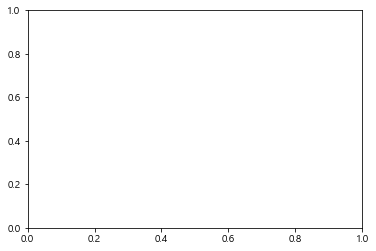

In [216]:
plt.figure()
marry['2017결혼'].plot(kind='barh', grid=True, figsize=(10,10)) # 수평 막대 그래프를, 그리드를 사용하여, 그림 크기를 10*10으로 지정함.
plt.show()